<a href="https://colab.research.google.com/github/Uros-Males/Minimization_Problem_On_Identical_Machines_Analysis/blob/main/4LRNeural_Network_Multi_Classs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IN PROGRESS....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import time
import keras

df = pd.read_csv('/content/sample_data/C-instances-runtime-analysis.csv')


shuffled = df.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus'] 
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']
names = ['indeks', 'n', 'n/m', '(n/m)^2', '(n/m)^3', 'm/n', 'av.length', 'std.dev', 'median', 'range', 'min', 'max', 'k']




In [2]:
y_new = []
for val in y:
  if(val<10):
    y_new.append(0)
  elif(10 <= val and val <100):
    y_new.append(1)
  elif(100<=val and val<1000):
    y_new.append(2)
  else:
    y_new.append(3)

shuffled['y_new'] = y_new
y_encoded = shuffled.loc[:,'y_new']
y_new = np.array(y_new)
X_modified = X

In [3]:
from imblearn.over_sampling import RandomOverSampler

names = [ 'n', 'm', 'max','std.dev', 'av.length']
X_modified = X.drop(['range','n/m', 'min', 'class','median', 'k',  'indeks',   'subtype', '(m/n)^3', '(m/n)^2', '(n/m)^2', '(n/m)^3','m/n'], axis = 1)
print(X_modified.head())

oversample = RandomOverSampler(random_state=0)
X_modified, y_encoded = oversample.fit_resample(X_modified, y_encoded)

     n   m   av.length     std.dev  max
0  144  24  343.187500  128.012924  570
1   90  10   73.877777   14.321218  100
2  198  22  507.641418  181.013947  790
3   18   6   95.888885   22.836733  139
4   40   4   87.949997   48.465660  239


In [4]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

l_encode = LabelEncoder()
l_encode.fit(y_encoded)
y_encoded = l_encode.transform(y_encoded)
y_encoded = to_categorical(y_encoded)
y_encoded

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [5]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

y_new = []
for val in y_encoded:
  if(val[0]==1):
    y_new.append(0)
  elif(val[1]==1):
    y_new.append(1)
  elif(val[2]==1):
    y_new.append(2)
  else:
    y_new.append(3)

X_train, X_test, y_train, y_test = train_test_split(X_modified, y_new, random_state=0, train_size = 0.83)
print(X_train.shape[0])
print(X_test.shape[0])

X_train = sc.fit_transform(X_train)
X_test_copy = X_test
X_test = sc.transform(X_test)


10371
2125


In [6]:
from keras.metrics import accuracy
from keras import callbacks

from sklearn.linear_model import LogisticRegression



from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-5,5,15), "penalty":["l2"]}
logreg=LogisticRegression(max_iter=1000)
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
p = logreg_cv.best_params_['C']


classifier = LogisticRegression(max_iter=1000, solver='lbfgs', C = p)
classifier.fit(X_train, y_train)

tuned hpyerparameters :(best parameters)  {'C': 26.826957952797272, 'penalty': 'l2'}


LogisticRegression(C=26.826957952797272, max_iter=1000)

accuracy: 77.46%


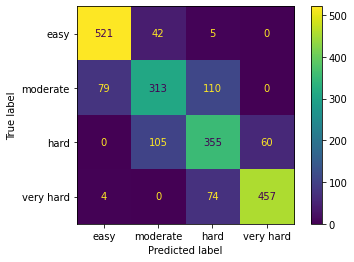

In [7]:
from keras.metrics import accuracy
pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred, labels=[0, 1, 2, 3])
cmd = ConfusionMatrixDisplay(cm, display_labels=['easy','moderate', 'hard', 'very hard'])
cmd.plot()
cnt=0
cnt_correct = 0
for i in range(len(pred)):
  cnt += 1
  if(pred[i] == y_test[i]):
    cnt_correct += 1
print(f'accuracy: {(cnt_correct/cnt)*100:.2f}%')


In [8]:
from keras.metrics import accuracy

av_bad = []
n_bad = []
std_dev_bad = []
max_bad = []
m_bad = []

print("very hard -> easy")
for i in range(len(pred)):
  if(pred[i] == 0 and y_test[i] == 3):
    av_bad.append(X_test_copy.iloc[i]['av.length'])
    n_bad.append(X_test_copy.iloc[i]['n'])
    std_dev_bad.append(X_test_copy.iloc[i]['std.dev'])
    max_bad.append(X_test_copy.iloc[i]['max'])
    m_bad.append(X_test_copy.iloc[i]['m'])


very hard -> easy


In [9]:
print("some vhard->vhard")

av_good = []
n_good = []
std_dev_good = []
max_good = []
m_good = []

for i in range(len(pred)):
  if(pred[i] == 3 and y_test[i] == 3):
    av_good.append(X_test_copy.iloc[i]['av.length'])
    n_good.append(X_test_copy.iloc[i]['n'])
    std_dev_good.append(X_test_copy.iloc[i]['std.dev'])
    max_good.append(X_test_copy.iloc[i]['max'])
    m_good.append(X_test_copy.iloc[i]['m'])
   

some vhard->vhard


In [10]:
av_good2 = []
n_good2 = []
std_dev_good2 = []
max_good2 = []
m_good2 = []

for i in range(len(pred)):
  if(pred[i] == 0 and y_test[i] == 0):
    av_good2.append(X_test_copy.iloc[i]['av.length'])
    n_good2.append(X_test_copy.iloc[i]['n'])
    std_dev_good2.append(X_test_copy.iloc[i]['std.dev'])
    max_good2.append(X_test_copy.iloc[i]['max'])
    m_good2.append(X_test_copy.iloc[i]['m'])

ROC AUC score: 0.8472854872683628


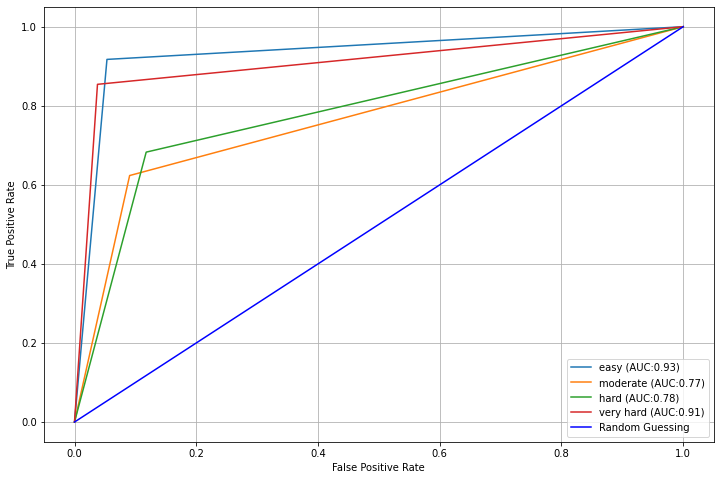

In [11]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ['easy', 'moderate', 'hard', 'very hard']

fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test, pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.grid()
plt.show()

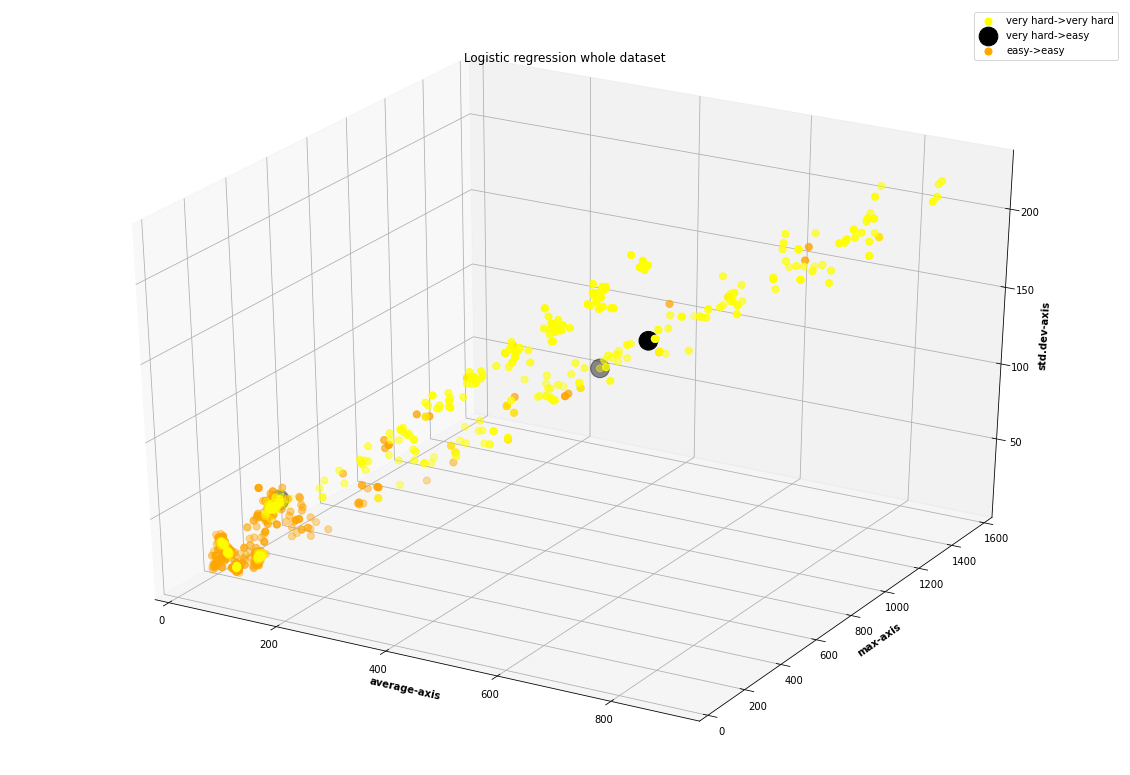

In [12]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (20, 14))
ax = plt.axes(projection ="3d")
   
ax.grid(b = True, color ='white',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

ax.scatter3D(av_good, max_good, std_dev_good, s = 50, color = 'yellow')
ax.scatter3D(av_bad, max_bad, std_dev_bad, s = 350, color = 'black')
ax.scatter3D(av_good2, max_good2, std_dev_good2, s = 50, color = 'orange')


plt.title("Logistic regression whole dataset")
ax.set_xlabel('average-axis', fontweight ='bold')
ax.set_ylabel('max-axis', fontweight ='bold')
ax.set_zlabel('std.dev-axis', fontweight ='bold')
ax.legend(['very hard->very hard', 'very hard->easy', 'easy->easy'])
 
# show plot
plt.show()

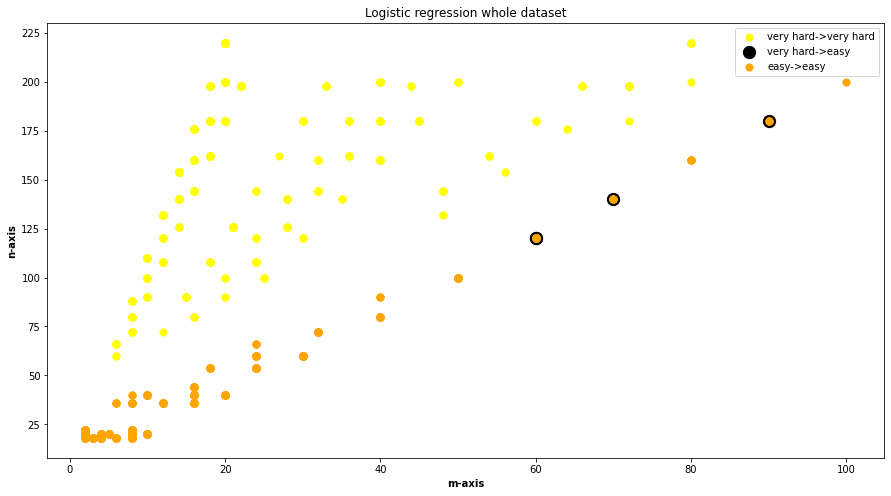

In [13]:
fig = plt.figure(figsize = (15, 8))
ax = plt.axes()

ax.scatter(m_good, n_good, s = 50, color = 'yellow')
ax.scatter(m_bad, n_bad, s = 150, color = 'black')
ax.scatter(m_good2, n_good2, s = 50, color = 'orange')


ax.set_xlabel('m-axis', fontweight ='bold')
ax.set_ylabel('n-axis', fontweight ='bold')
plt.title("Logistic regression whole dataset")

ax.legend(['very hard->very hard', 'very hard->easy', 'easy->easy'])
 
# show plot
plt.show()

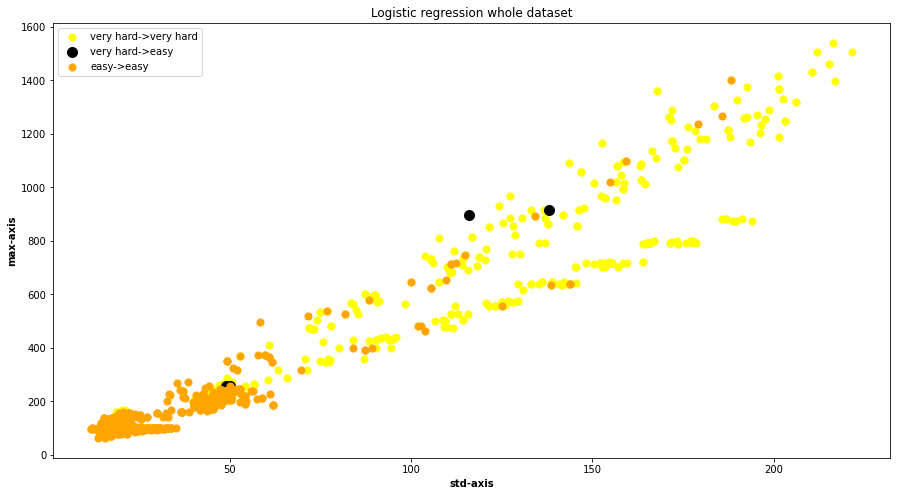

In [14]:
fig = plt.figure(figsize = (15, 8))
ax = plt.axes()

ax.scatter(std_dev_good, max_good, s = 50, color = 'yellow')
ax.scatter(std_dev_bad, max_bad, s = 100, color = 'black')
ax.scatter(std_dev_good2, max_good2, s = 50, color = 'orange')


ax.set_xlabel('std-axis', fontweight ='bold')
ax.set_ylabel('max-axis', fontweight ='bold')
plt.title("Logistic regression whole dataset")

ax.legend(['very hard->very hard', 'very hard->easy', 'easy->easy'])
 
# show plot
plt.show()

[11.20589791  8.24008468  2.05775954  1.89851106  2.6349542 ]


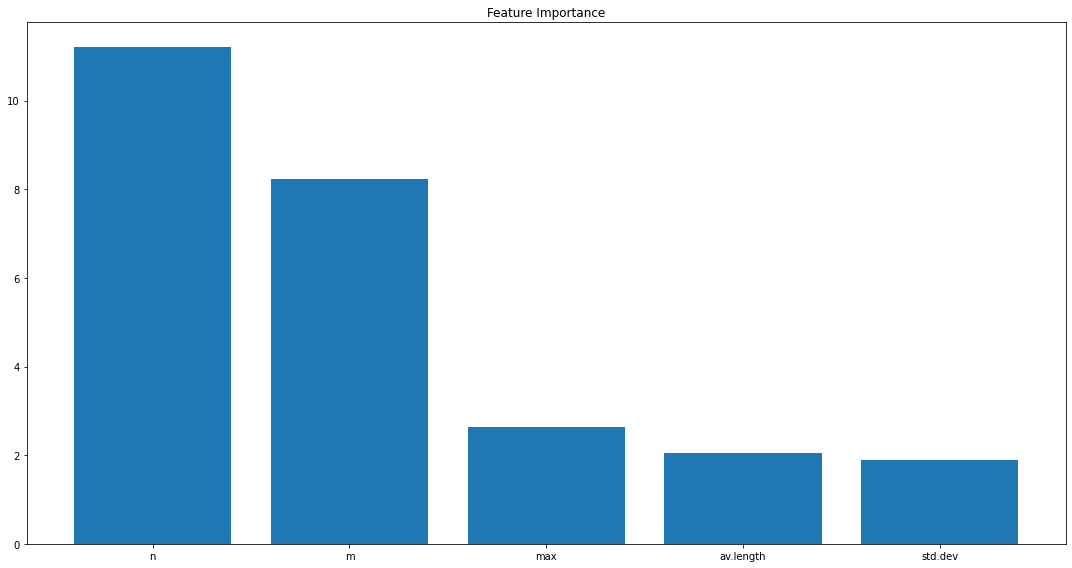

In [15]:
importances = classifier.coef_[0]
importances = abs(importances)

#importances = (importances-np.min(importances))/np.ptp(importances)

sorted_indices = np.argsort(importances)[::-1]
feat_labels = X_test_copy.columns[1:]

print(importances)

plt.figure(figsize=(15, 8))
plt.title('Feature Importance')
plt.bar(range(X_test_copy.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_test_copy.shape[1]), X_test_copy.columns[sorted_indices])
plt.tight_layout()
plt.show()